In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint 
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydot
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm

tempIemisions = pd.read_csv("DataSetFinal.csv", index_col=0)
dummiesCountry=pd.get_dummies(tempIemisions['Country'],drop_first=1)
tempIemisions=pd.concat([tempIemisions,dummiesCountry],axis=1)
tempIemisions=tempIemisions.drop(['Country'], axis=1)

#fem X totes les columnes menys temp i y nomes temp el axis=1 es per indicar
#que es una label de les columnes
X = tempIemisions.drop('AverageTemperature', axis=1)
y = tempIemisions['AverageTemperature']

#dividim el dataSet en test 20% i entrenament 80%
#el random_state es la llavor que s'utilitzarà per randomitzar 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Using TensorFlow backend.


In [47]:
print(tempIemisions)

      Data            CO2           N2O           CH4  AverageTemperature  \
0     1990   62297.166000   4293.063000  10598.566000              -2.443   
1     1990   63417.203939   4342.948570  10608.935464               2.713   
2     1990   64354.776643   4385.020950  10614.433618               5.391   
3     1990   65120.698769   4419.699865  10615.394522               5.462   
4     1990   65725.784968   4447.405043  10612.152237              12.561   
5     1990   66180.849897   4468.556210  10605.040823              14.199   
6     1990   66496.708208   4483.573093  10594.394342              15.992   
7     1990   66684.174557   4492.875417  10580.546853              16.846   
8     1990   66754.063597   4496.882909  10563.832418              10.564   
9     1990   66717.189983   4496.015296  10544.585098               8.224   
10    1990   66584.368368   4490.692305  10523.138952               2.021   
11    1990   66366.413408   4481.333662  10499.828041              -3.402   

In [8]:
#creem l'algorisme del arbre de decisions i l'entrenem
regressor = DecisionTreeRegressor(max_depth=475,min_samples_leaf=4,min_samples_split=23)
regressor.fit(X_train,y_train)


#fem les prediccions
y_predDT = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predDT))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predDT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predDT)))
comparacioDTR=pd.DataFrame({'Actual':y_test, 'Predicted':y_predDT})

Mean Absolute Error: 1.3645617860482255
Mean Squared Error: 3.412702625234641
Root Mean Squared Error: 1.847350163134927


In [128]:
#creem l'algorisme del SVM i l'entrenem
clf = svm.SVR(kernel='rbf', C = 750, gamma = 'scale', tol = 0.06, epsilon=0.6)
clf.fit(X_train, y_train)
y_predSVM = clf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predSVM))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predSVM))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predSVM)))

Mean Absolute Error: 4.379826376618222
Mean Squared Error: 36.09824138309669
Root Mean Squared Error: 6.008181204249476


In [10]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(bootstrap = True, max_depth = 172, min_samples_leaf = 3, min_samples_split = 12,
                           n_estimators = 1143, random_state = 28)
rf.fit(X_train, y_train)
y_predRT = rf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predRT))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predRT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predRT)))
comparacioRF=pd.DataFrame({'Actual':y_test, 'Predicted':y_predRT})

Mean Absolute Error: 1.2841193979350016
Mean Squared Error: 2.901036478517489
Root Mean Squared Error: 1.7032429299772505


In [97]:
#xarxa neuronal que va malament
model = Sequential()
model.add(Dense(55, input_dim=X_train.shape[1], activation='relu', kernel_initializer='normal'))
model.add(Dense(31, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam', metrics=['mae'])
# Fit the model
history = model.fit(X_train, y_train, epochs=2400,validation_split = 0.2, batch_size=84 ,verbose=1)

y_predNN = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predNN))

Train on 4768 samples, validate on 1193 samples
Epoch 1/2400
4768/4768 [==============================] - 0s 104us/step - loss: 25.3049 - mean_absolute_error: 25.3049 - val_loss: 8.2678 - val_mean_absolute_error: 8.2678
Epoch 2/2400
4768/4768 [==============================] - 0s 15us/step - loss: 10.1524 - mean_absolute_error: 10.1524 - val_loss: 14.4699 - val_mean_absolute_error: 14.4699
Epoch 3/2400
4768/4768 [==============================] - 0s 16us/step - loss: 9.3507 - mean_absolute_error: 9.3507 - val_loss: 7.5533 - val_mean_absolute_error: 7.5533
Epoch 4/2400
4768/4768 [==============================] - 0s 12us/step - loss: 10.0030 - mean_absolute_error: 10.0030 - val_loss: 9.4889 - val_mean_absolute_error: 9.4889
Epoch 5/2400
4768/4768 [==============================] - 0s 10us/step - loss: 11.4741 - mean_absolute_error: 11.4741 - val_loss: 7.4664 - val_mean_absolute_error: 7.4664
Epoch 6/2400
4768/4768 [==============================] - 0s 10us/step - loss: 7.7247 - mean_abs

Epoch 49/2400
4768/4768 [==============================] - 0s 10us/step - loss: 7.0572 - mean_absolute_error: 7.0572 - val_loss: 6.8076 - val_mean_absolute_error: 6.8076
Epoch 50/2400
4768/4768 [==============================] - 0s 10us/step - loss: 7.3049 - mean_absolute_error: 7.3049 - val_loss: 6.7582 - val_mean_absolute_error: 6.7582
Epoch 51/2400
4768/4768 [==============================] - 0s 13us/step - loss: 7.0787 - mean_absolute_error: 7.0787 - val_loss: 6.8439 - val_mean_absolute_error: 6.8439
Epoch 52/2400
4768/4768 [==============================] - 0s 12us/step - loss: 7.1962 - mean_absolute_error: 7.1962 - val_loss: 7.1412 - val_mean_absolute_error: 7.1412
Epoch 53/2400
4768/4768 [==============================] - 0s 12us/step - loss: 7.1074 - mean_absolute_error: 7.1074 - val_loss: 6.8124 - val_mean_absolute_error: 6.8124
Epoch 54/2400
4768/4768 [==============================] - ETA: 0s - loss: 6.0227 - mean_absolute_error: 6.022 - 0s 12us/step - loss: 7.0876 - mean_ab

Epoch 97/2400
4768/4768 [==============================] - 0s 10us/step - loss: 7.2139 - mean_absolute_error: 7.2139 - val_loss: 6.7926 - val_mean_absolute_error: 6.7926
Epoch 98/2400
4768/4768 [==============================] - 0s 10us/step - loss: 7.3066 - mean_absolute_error: 7.3066 - val_loss: 6.6914 - val_mean_absolute_error: 6.6914
Epoch 99/2400
4768/4768 [==============================] - 0s 11us/step - loss: 7.1611 - mean_absolute_error: 7.1611 - val_loss: 6.6939 - val_mean_absolute_error: 6.6939
Epoch 100/2400
4768/4768 [==============================] - 0s 10us/step - loss: 7.0757 - mean_absolute_error: 7.0757 - val_loss: 7.0367 - val_mean_absolute_error: 7.0367
Epoch 101/2400
4768/4768 [==============================] - 0s 11us/step - loss: 7.0351 - mean_absolute_error: 7.0351 - val_loss: 7.0987 - val_mean_absolute_error: 7.0987
Epoch 102/2400
4768/4768 [==============================] - 0s 12us/step - loss: 6.9883 - mean_absolute_error: 6.9883 - val_loss: 6.6874 - val_mean_

Epoch 145/2400
4768/4768 [==============================] - 0s 10us/step - loss: 7.1202 - mean_absolute_error: 7.1202 - val_loss: 6.6634 - val_mean_absolute_error: 6.6634
Epoch 146/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.7802 - mean_absolute_error: 6.7802 - val_loss: 6.9716 - val_mean_absolute_error: 6.9716
Epoch 147/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.8055 - mean_absolute_error: 6.8055 - val_loss: 6.6316 - val_mean_absolute_error: 6.6316
Epoch 148/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.7467 - mean_absolute_error: 6.7467 - val_loss: 6.6347 - val_mean_absolute_error: 6.6347
Epoch 149/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.7365 - mean_absolute_error: 6.7365 - val_loss: 6.7651 - val_mean_absolute_error: 6.7651
Epoch 150/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.9946 - mean_absolute_error: 6.9946 - val_loss: 6.7266 - val_mea

4768/4768 [==============================] - 0s 10us/step - loss: 6.8215 - mean_absolute_error: 6.8215 - val_loss: 6.9548 - val_mean_absolute_error: 6.9548
Epoch 194/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.8481 - mean_absolute_error: 6.8481 - val_loss: 6.6787 - val_mean_absolute_error: 6.6787
Epoch 195/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.9481 - mean_absolute_error: 6.9481 - val_loss: 6.6757 - val_mean_absolute_error: 6.6757
Epoch 196/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.8474 - mean_absolute_error: 6.8474 - val_loss: 6.6522 - val_mean_absolute_error: 6.6522
Epoch 197/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.8095 - mean_absolute_error: 6.8095 - val_loss: 6.9078 - val_mean_absolute_error: 6.9078
Epoch 198/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.8328 - mean_absolute_error: 6.8328 - val_loss: 6.7597 - val_mean_absolute_error: 6

4768/4768 [==============================] - 0s 9us/step - loss: 6.5724 - mean_absolute_error: 6.5724 - val_loss: 6.5071 - val_mean_absolute_error: 6.5071
Epoch 242/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.6637 - mean_absolute_error: 6.6637 - val_loss: 6.4938 - val_mean_absolute_error: 6.4938
Epoch 243/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.5211 - mean_absolute_error: 6.5211 - val_loss: 6.7904 - val_mean_absolute_error: 6.7904
Epoch 244/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.5931 - mean_absolute_error: 6.5931 - val_loss: 6.4808 - val_mean_absolute_error: 6.4808
Epoch 245/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.6987 - mean_absolute_error: 6.6987 - val_loss: 6.6506 - val_mean_absolute_error: 6.6506
Epoch 246/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.5451 - mean_absolute_error: 6.5451 - val_loss: 7.2019 - val_mean_absolute_error: 

4768/4768 [==============================] - 0s 9us/step - loss: 6.4838 - mean_absolute_error: 6.4838 - val_loss: 6.4755 - val_mean_absolute_error: 6.4755
Epoch 290/2400
4768/4768 [==============================] - 0s 8us/step - loss: 6.4614 - mean_absolute_error: 6.4614 - val_loss: 6.5618 - val_mean_absolute_error: 6.5618
Epoch 291/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.6022 - mean_absolute_error: 6.6022 - val_loss: 6.6269 - val_mean_absolute_error: 6.6269
Epoch 292/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.5367 - mean_absolute_error: 6.5367 - val_loss: 6.4321 - val_mean_absolute_error: 6.4321
Epoch 293/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.6090 - mean_absolute_error: 6.6090 - val_loss: 6.5637 - val_mean_absolute_error: 6.5637
Epoch 294/2400
4768/4768 [==============================] - 0s 11us/step - loss: 6.5100 - mean_absolute_error: 6.5100 - val_loss: 6.4691 - val_mean_absolute_error: 

4768/4768 [==============================] - 0s 9us/step - loss: 6.4272 - mean_absolute_error: 6.4272 - val_loss: 6.5708 - val_mean_absolute_error: 6.5708
Epoch 338/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.4191 - mean_absolute_error: 6.4191 - val_loss: 6.4414 - val_mean_absolute_error: 6.4414
Epoch 339/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.5185 - mean_absolute_error: 6.5185 - val_loss: 6.3771 - val_mean_absolute_error: 6.3771
Epoch 340/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.4315 - mean_absolute_error: 6.4315 - val_loss: 6.3947 - val_mean_absolute_error: 6.3947
Epoch 341/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.4836 - mean_absolute_error: 6.4836 - val_loss: 6.5027 - val_mean_absolute_error: 6.5027
Epoch 342/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.3839 - mean_absolute_error: 6.3839 - val_loss: 6.4540 - val_mean_absolute_error:

4768/4768 [==============================] - 0s 12us/step - loss: 6.3707 - mean_absolute_error: 6.3707 - val_loss: 6.4932 - val_mean_absolute_error: 6.4932
Epoch 386/2400
4768/4768 [==============================] - 0s 12us/step - loss: 6.3652 - mean_absolute_error: 6.3652 - val_loss: 6.4239 - val_mean_absolute_error: 6.4239
Epoch 387/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.3890 - mean_absolute_error: 6.3890 - val_loss: 6.7183 - val_mean_absolute_error: 6.7183
Epoch 388/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.4216 - mean_absolute_error: 6.4216 - val_loss: 6.4350 - val_mean_absolute_error: 6.4350
Epoch 389/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.4011 - mean_absolute_error: 6.4011 - val_loss: 6.4817 - val_mean_absolute_error: 6.4817
Epoch 390/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.3755 - mean_absolute_error: 6.3755 - val_loss: 6.4977 - val_mean_absolute_erro

4768/4768 [==============================] - 0s 10us/step - loss: 6.3918 - mean_absolute_error: 6.3918 - val_loss: 6.7021 - val_mean_absolute_error: 6.7021
Epoch 434/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.4396 - mean_absolute_error: 6.4396 - val_loss: 6.3800 - val_mean_absolute_error: 6.3800
Epoch 435/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.4376 - mean_absolute_error: 6.4376 - val_loss: 6.4438 - val_mean_absolute_error: 6.4438
Epoch 436/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.3711 - mean_absolute_error: 6.3711 - val_loss: 6.4846 - val_mean_absolute_error: 6.4846
Epoch 437/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.3705 - mean_absolute_error: 6.3705 - val_loss: 6.4478 - val_mean_absolute_error: 6.4478
Epoch 438/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.3062 - mean_absolute_error: 6.3062 - val_loss: 6.4713 - val_mean_absolute_error:

Epoch 481/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.2242 - mean_absolute_error: 6.2242 - val_loss: 6.3634 - val_mean_absolute_error: 6.3634
Epoch 482/2400
4768/4768 [==============================] - 0s 12us/step - loss: 6.2512 - mean_absolute_error: 6.2512 - val_loss: 6.5693 - val_mean_absolute_error: 6.5693
Epoch 483/2400
4768/4768 [==============================] - 0s 11us/step - loss: 6.3242 - mean_absolute_error: 6.3242 - val_loss: 6.3530 - val_mean_absolute_error: 6.3530
Epoch 484/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.3050 - mean_absolute_error: 6.3050 - val_loss: 6.3835 - val_mean_absolute_error: 6.3835
Epoch 485/2400
4768/4768 [==============================] - 0s 12us/step - loss: 6.3044 - mean_absolute_error: 6.3044 - val_loss: 6.2938 - val_mean_absolute_error: 6.2938
Epoch 486/2400
4768/4768 [==============================] - 0s 11us/step - loss: 6.3443 - mean_absolute_error: 6.3443 - val_loss: 6.3591 - val_mea

4768/4768 [==============================] - 0s 10us/step - loss: 5.9589 - mean_absolute_error: 5.9589 - val_loss: 6.2392 - val_mean_absolute_error: 6.2392
Epoch 530/2400
4768/4768 [==============================] - 0s 10us/step - loss: 5.9305 - mean_absolute_error: 5.9305 - val_loss: 6.0448 - val_mean_absolute_error: 6.0448
Epoch 531/2400
4768/4768 [==============================] - 0s 9us/step - loss: 5.9587 - mean_absolute_error: 5.9587 - val_loss: 5.9751 - val_mean_absolute_error: 5.9751
Epoch 532/2400
4768/4768 [==============================] - 0s 9us/step - loss: 5.8965 - mean_absolute_error: 5.8965 - val_loss: 6.0308 - val_mean_absolute_error: 6.0308
Epoch 533/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.1823 - mean_absolute_error: 6.1823 - val_loss: 6.2059 - val_mean_absolute_error: 6.2059
Epoch 534/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.0577 - mean_absolute_error: 6.0577 - val_loss: 6.0560 - val_mean_absolute_error: 

4768/4768 [==============================] - 0s 10us/step - loss: 5.3833 - mean_absolute_error: 5.3833 - val_loss: 5.4654 - val_mean_absolute_error: 5.4654
Epoch 578/2400
4768/4768 [==============================] - 0s 10us/step - loss: 5.2774 - mean_absolute_error: 5.2774 - val_loss: 5.3473 - val_mean_absolute_error: 5.3473
Epoch 579/2400
4768/4768 [==============================] - 0s 9us/step - loss: 5.2915 - mean_absolute_error: 5.2915 - val_loss: 5.5492 - val_mean_absolute_error: 5.5492
Epoch 580/2400
4768/4768 [==============================] - 0s 10us/step - loss: 5.2398 - mean_absolute_error: 5.2398 - val_loss: 5.4319 - val_mean_absolute_error: 5.4319
Epoch 581/2400
4768/4768 [==============================] - 0s 10us/step - loss: 5.3756 - mean_absolute_error: 5.3756 - val_loss: 6.6150 - val_mean_absolute_error: 6.6150
Epoch 582/2400
4768/4768 [==============================] - 0s 9us/step - loss: 5.4372 - mean_absolute_error: 5.4372 - val_loss: 5.8148 - val_mean_absolute_error

4768/4768 [==============================] - 0s 9us/step - loss: 5.3012 - mean_absolute_error: 5.3012 - val_loss: 5.2017 - val_mean_absolute_error: 5.2017
Epoch 626/2400
4768/4768 [==============================] - 0s 9us/step - loss: 5.0133 - mean_absolute_error: 5.0133 - val_loss: 5.3468 - val_mean_absolute_error: 5.3468
Epoch 627/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.9855 - mean_absolute_error: 4.9855 - val_loss: 5.1477 - val_mean_absolute_error: 5.1477
Epoch 628/2400
4768/4768 [==============================] - 0s 9us/step - loss: 5.0204 - mean_absolute_error: 5.0204 - val_loss: 5.2288 - val_mean_absolute_error: 5.2288
Epoch 629/2400
4768/4768 [==============================] - 0s 8us/step - loss: 5.1466 - mean_absolute_error: 5.1466 - val_loss: 5.7751 - val_mean_absolute_error: 5.7751
Epoch 630/2400
4768/4768 [==============================] - 0s 18us/step - loss: 5.2229 - mean_absolute_error: 5.2229 - val_loss: 5.5054 - val_mean_absolute_error: 5

4768/4768 [==============================] - 0s 11us/step - loss: 5.1064 - mean_absolute_error: 5.1064 - val_loss: 5.3083 - val_mean_absolute_error: 5.3083
Epoch 674/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.8598 - mean_absolute_error: 4.8598 - val_loss: 5.0815 - val_mean_absolute_error: 5.0815
Epoch 675/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.8146 - mean_absolute_error: 4.8146 - val_loss: 4.9501 - val_mean_absolute_error: 4.9501
Epoch 676/2400
4768/4768 [==============================] - 0s 10us/step - loss: 5.1178 - mean_absolute_error: 5.1178 - val_loss: 5.2195 - val_mean_absolute_error: 5.2195
Epoch 677/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.9057 - mean_absolute_error: 4.9057 - val_loss: 5.5372 - val_mean_absolute_error: 5.5372
Epoch 678/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.9539 - mean_absolute_error: 4.9539 - val_loss: 5.2166 - val_mean_absolute_err

Epoch 721/2400
4768/4768 [==============================] - 0s 11us/step - loss: 4.7639 - mean_absolute_error: 4.7639 - val_loss: 4.8128 - val_mean_absolute_error: 4.8128
Epoch 722/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.8675 - mean_absolute_error: 4.8675 - val_loss: 4.8368 - val_mean_absolute_error: 4.8368
Epoch 723/2400
4768/4768 [==============================] - 0s 9us/step - loss: 5.1573 - mean_absolute_error: 5.1573 - val_loss: 5.7506 - val_mean_absolute_error: 5.7506
Epoch 724/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.8072 - mean_absolute_error: 4.8072 - val_loss: 4.6893 - val_mean_absolute_error: 4.6893
Epoch 725/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.7449 - mean_absolute_error: 4.7449 - val_loss: 4.7026 - val_mean_absolute_error: 4.7026
Epoch 726/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.5082 - mean_absolute_error: 4.5082 - val_loss: 4.7760 - val_mean_a

4768/4768 [==============================] - 0s 13us/step - loss: 4.5534 - mean_absolute_error: 4.5534 - val_loss: 4.6609 - val_mean_absolute_error: 4.6609
Epoch 770/2400
4768/4768 [==============================] - 0s 12us/step - loss: 4.5062 - mean_absolute_error: 4.5062 - val_loss: 4.6830 - val_mean_absolute_error: 4.6830
Epoch 771/2400
4768/4768 [==============================] - 0s 11us/step - loss: 4.6518 - mean_absolute_error: 4.6518 - val_loss: 5.1956 - val_mean_absolute_error: 5.1956
Epoch 772/2400
4768/4768 [==============================] - 0s 11us/step - loss: 4.4300 - mean_absolute_error: 4.4300 - val_loss: 4.4604 - val_mean_absolute_error: 4.4604
Epoch 773/2400
4768/4768 [==============================] - 0s 11us/step - loss: 4.6036 - mean_absolute_error: 4.6036 - val_loss: 5.0574 - val_mean_absolute_error: 5.0574
Epoch 774/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.6647 - mean_absolute_error: 4.6647 - val_loss: 4.6277 - val_mean_absolute_err

Epoch 817/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.7477 - mean_absolute_error: 4.7477 - val_loss: 4.8792 - val_mean_absolute_error: 4.8792
Epoch 818/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.6899 - mean_absolute_error: 4.6899 - val_loss: 4.5753 - val_mean_absolute_error: 4.5753
Epoch 819/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.6027 - mean_absolute_error: 4.6027 - val_loss: 4.5892 - val_mean_absolute_error: 4.5892
Epoch 820/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.5129 - mean_absolute_error: 4.5129 - val_loss: 4.6767 - val_mean_absolute_error: 4.6767
Epoch 821/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.3109 - mean_absolute_error: 4.3109 - val_loss: 4.3893 - val_mean_absolute_error: 4.3893
Epoch 822/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.3103 - mean_absolute_error: 4.3103 - val_loss: 4.5279 - val_mean_

4768/4768 [==============================] - 0s 13us/step - loss: 4.2046 - mean_absolute_error: 4.2046 - val_loss: 4.6320 - val_mean_absolute_error: 4.6320
Epoch 866/2400
4768/4768 [==============================] - 0s 13us/step - loss: 4.5809 - mean_absolute_error: 4.5809 - val_loss: 4.5068 - val_mean_absolute_error: 4.5068
Epoch 867/2400
4768/4768 [==============================] - 0s 12us/step - loss: 4.2622 - mean_absolute_error: 4.2622 - val_loss: 4.2426 - val_mean_absolute_error: 4.2426
Epoch 868/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.2857 - mean_absolute_error: 4.2857 - val_loss: 4.2817 - val_mean_absolute_error: 4.2817
Epoch 869/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.2130 - mean_absolute_error: 4.2130 - val_loss: 5.3169 - val_mean_absolute_error: 5.3169
Epoch 870/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.3674 - mean_absolute_error: 4.3674 - val_loss: 4.5873 - val_mean_absolute_error

4768/4768 [==============================] - 0s 8us/step - loss: 4.0629 - mean_absolute_error: 4.0629 - val_loss: 4.0919 - val_mean_absolute_error: 4.0919
Epoch 914/2400
4768/4768 [==============================] - 0s 11us/step - loss: 4.0128 - mean_absolute_error: 4.0128 - val_loss: 4.4573 - val_mean_absolute_error: 4.4573
Epoch 915/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.3870 - mean_absolute_error: 4.3870 - val_loss: 4.3746 - val_mean_absolute_error: 4.3746
Epoch 916/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.9191 - mean_absolute_error: 3.9191 - val_loss: 3.9342 - val_mean_absolute_error: 3.9342
Epoch 917/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.2846 - mean_absolute_error: 4.2846 - val_loss: 4.3860 - val_mean_absolute_error: 4.3860
Epoch 918/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.9609 - mean_absolute_error: 3.9609 - val_loss: 3.8599 - val_mean_absolute_error

4768/4768 [==============================] - 0s 10us/step - loss: 3.8862 - mean_absolute_error: 3.8862 - val_loss: 3.5888 - val_mean_absolute_error: 3.5888
Epoch 962/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.1768 - mean_absolute_error: 4.1768 - val_loss: 4.4825 - val_mean_absolute_error: 4.4825
Epoch 963/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.0252 - mean_absolute_error: 4.0252 - val_loss: 4.2273 - val_mean_absolute_error: 4.2273
Epoch 964/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7176 - mean_absolute_error: 3.7176 - val_loss: 4.0639 - val_mean_absolute_error: 4.0639
Epoch 965/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7376 - mean_absolute_error: 3.7376 - val_loss: 4.3908 - val_mean_absolute_error: 4.3908
Epoch 966/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.9811 - mean_absolute_error: 3.9811 - val_loss: 4.2979 - val_mean_absolute_error:

4768/4768 [==============================] - 0s 9us/step - loss: 3.7143 - mean_absolute_error: 3.7143 - val_loss: 4.1074 - val_mean_absolute_error: 4.1074
Epoch 1010/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.6515 - mean_absolute_error: 3.6515 - val_loss: 3.6105 - val_mean_absolute_error: 3.6105
Epoch 1011/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7494 - mean_absolute_error: 3.7494 - val_loss: 4.0874 - val_mean_absolute_error: 4.0874
Epoch 1012/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.1364 - mean_absolute_error: 4.1364 - val_loss: 4.0268 - val_mean_absolute_error: 4.0268
Epoch 1013/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.7362 - mean_absolute_error: 3.7362 - val_loss: 3.5153 - val_mean_absolute_error: 3.5153
Epoch 1014/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7393 - mean_absolute_error: 3.7393 - val_loss: 4.2718 - val_mean_absolute_er

Epoch 1057/2400
4768/4768 [==============================] - 0s 13us/step - loss: 3.7285 - mean_absolute_error: 3.7285 - val_loss: 3.8370 - val_mean_absolute_error: 3.8370
Epoch 1058/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.4926 - mean_absolute_error: 3.4926 - val_loss: 3.5503 - val_mean_absolute_error: 3.5503
Epoch 1059/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.5851 - mean_absolute_error: 3.5851 - val_loss: 3.4428 - val_mean_absolute_error: 3.4428
Epoch 1060/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.6655 - mean_absolute_error: 3.6655 - val_loss: 4.3853 - val_mean_absolute_error: 4.3853
Epoch 1061/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.7943 - mean_absolute_error: 3.7943 - val_loss: 3.7200 - val_mean_absolute_error: 3.7200
Epoch 1062/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.6225 - mean_absolute_error: 3.6225 - val_loss: 4.6076 - 

Epoch 1105/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.8240 - mean_absolute_error: 3.8240 - val_loss: 3.9104 - val_mean_absolute_error: 3.9104
Epoch 1106/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.6775 - mean_absolute_error: 3.6775 - val_loss: 4.2149 - val_mean_absolute_error: 4.2149
Epoch 1107/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.5450 - mean_absolute_error: 3.5450 - val_loss: 3.4952 - val_mean_absolute_error: 3.4952
Epoch 1108/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.6015 - mean_absolute_error: 3.6015 - val_loss: 3.9589 - val_mean_absolute_error: 3.9589
Epoch 1109/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.5138 - mean_absolute_error: 3.5138 - val_loss: 4.3466 - val_mean_absolute_error: 4.3466
Epoch 1110/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.8290 - mean_absolute_error: 3.8290 - val_loss: 3.9179 - val

4768/4768 [==============================] - 0s 9us/step - loss: 3.4529 - mean_absolute_error: 3.4529 - val_loss: 3.5307 - val_mean_absolute_error: 3.5307
Epoch 1153/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4619 - mean_absolute_error: 3.4619 - val_loss: 3.7355 - val_mean_absolute_error: 3.7355
Epoch 1154/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.6325 - mean_absolute_error: 3.6325 - val_loss: 3.2893 - val_mean_absolute_error: 3.2893
Epoch 1155/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4066 - mean_absolute_error: 3.4066 - val_loss: 3.8151 - val_mean_absolute_error: 3.8151
Epoch 1156/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7821 - mean_absolute_error: 3.7821 - val_loss: 3.6550 - val_mean_absolute_error: 3.6550
Epoch 1157/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3208 - mean_absolute_error: 3.3208 - val_loss: 3.4222 - val_mean_absolute_erro

Epoch 1200/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.2956 - mean_absolute_error: 3.2956 - val_loss: 3.5426 - val_mean_absolute_error: 3.5426
Epoch 1201/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.5492 - mean_absolute_error: 3.5492 - val_loss: 4.0991 - val_mean_absolute_error: 4.0991
Epoch 1202/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.6608 - mean_absolute_error: 3.6608 - val_loss: 4.3172 - val_mean_absolute_error: 4.3172
Epoch 1203/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.6324 - mean_absolute_error: 3.6324 - val_loss: 3.7568 - val_mean_absolute_error: 3.7568
Epoch 1204/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.6958 - mean_absolute_error: 3.6958 - val_loss: 3.8656 - val_mean_absolute_error: 3.8656
Epoch 1205/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.8762 - mean_absolute_error: 3.8762 - val_loss: 3.8687 - val_

Epoch 1248/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3859 - mean_absolute_error: 3.3859 - val_loss: 4.7013 - val_mean_absolute_error: 4.7013
Epoch 1249/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7382 - mean_absolute_error: 3.7382 - val_loss: 5.0164 - val_mean_absolute_error: 5.0164
Epoch 1250/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7825 - mean_absolute_error: 3.7825 - val_loss: 4.3069 - val_mean_absolute_error: 4.3069
Epoch 1251/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4811 - mean_absolute_error: 3.4811 - val_loss: 3.8914 - val_mean_absolute_error: 3.8914
Epoch 1252/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.6570 - mean_absolute_error: 3.6570 - val_loss: 3.7248 - val_mean_absolute_error: 3.7248
Epoch 1253/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.6932 - mean_absolute_error: 3.6932 - val_loss: 3.7269 - val_m

Epoch 1296/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.5740 - mean_absolute_error: 3.5740 - val_loss: 4.3878 - val_mean_absolute_error: 4.3878
Epoch 1297/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.5689 - mean_absolute_error: 3.5689 - val_loss: 3.5322 - val_mean_absolute_error: 3.5322
Epoch 1298/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.6112 - mean_absolute_error: 3.6112 - val_loss: 4.1421 - val_mean_absolute_error: 4.1421
Epoch 1299/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.8671 - mean_absolute_error: 3.8671 - val_loss: 4.2332 - val_mean_absolute_error: 4.2332
Epoch 1300/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4715 - mean_absolute_error: 3.4715 - val_loss: 4.0347 - val_mean_absolute_error: 4.0347
Epoch 1301/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4816 - mean_absolute_error: 3.4816 - val_loss: 5.3121 - val_

Epoch 1344/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.6190 - mean_absolute_error: 3.6190 - val_loss: 3.2988 - val_mean_absolute_error: 3.2988
Epoch 1345/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.6306 - mean_absolute_error: 3.6306 - val_loss: 3.7678 - val_mean_absolute_error: 3.7678
Epoch 1346/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.4120 - mean_absolute_error: 3.4120 - val_loss: 3.8604 - val_mean_absolute_error: 3.8604
Epoch 1347/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.4084 - mean_absolute_error: 3.4084 - val_loss: 3.3327 - val_mean_absolute_error: 3.3327
Epoch 1348/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.2996 - mean_absolute_error: 3.2996 - val_loss: 3.1745 - val_mean_absolute_error: 3.1745
Epoch 1349/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.4836 - mean_absolute_error: 4.4836 - val_loss: 4.1777 - val

Epoch 1392/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.3267 - mean_absolute_error: 3.3267 - val_loss: 4.2295 - val_mean_absolute_error: 4.2295
Epoch 1393/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4673 - mean_absolute_error: 3.4673 - val_loss: 3.6681 - val_mean_absolute_error: 3.6681
Epoch 1394/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.2317 - mean_absolute_error: 3.2317 - val_loss: 3.5267 - val_mean_absolute_error: 3.5267
Epoch 1395/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.2085 - mean_absolute_error: 3.2085 - val_loss: 3.3768 - val_mean_absolute_error: 3.3768
Epoch 1396/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.5660 - mean_absolute_error: 3.5660 - val_loss: 3.8371 - val_mean_absolute_error: 3.8371
Epoch 1397/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4863 - mean_absolute_error: 3.4863 - val_loss: 3.4155 - va

Epoch 1440/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.6262 - mean_absolute_error: 3.6262 - val_loss: 4.0249 - val_mean_absolute_error: 4.0249
Epoch 1441/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.4268 - mean_absolute_error: 3.4268 - val_loss: 3.5248 - val_mean_absolute_error: 3.5248
Epoch 1442/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.3209 - mean_absolute_error: 3.3209 - val_loss: 4.0390 - val_mean_absolute_error: 4.0390
Epoch 1443/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.4665 - mean_absolute_error: 3.4665 - val_loss: 4.1377 - val_mean_absolute_error: 4.1377
Epoch 1444/2400
4768/4768 [==============================] - 0s 13us/step - loss: 3.4561 - mean_absolute_error: 3.4561 - val_loss: 3.1408 - val_mean_absolute_error: 3.1408
Epoch 1445/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.5168 - mean_absolute_error: 3.5168 - val_loss: 3.7529 - 

Epoch 1488/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.4537 - mean_absolute_error: 3.4537 - val_loss: 3.2204 - val_mean_absolute_error: 3.2204
Epoch 1489/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.7656 - mean_absolute_error: 3.7656 - val_loss: 4.1369 - val_mean_absolute_error: 4.1369
Epoch 1490/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.5028 - mean_absolute_error: 3.5028 - val_loss: 3.2817 - val_mean_absolute_error: 3.2817
Epoch 1491/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.2293 - mean_absolute_error: 3.2293 - val_loss: 3.4204 - val_mean_absolute_error: 3.4204
Epoch 1492/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.7218 - mean_absolute_error: 3.7218 - val_loss: 3.4364 - val_mean_absolute_error: 3.4364
Epoch 1493/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.3176 - mean_absolute_error: 3.3176 - val_loss: 3.8052 - 

Epoch 1536/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.7177 - mean_absolute_error: 3.7177 - val_loss: 4.0902 - val_mean_absolute_error: 4.0902
Epoch 1537/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.4859 - mean_absolute_error: 3.4859 - val_loss: 3.0948 - val_mean_absolute_error: 3.0948
Epoch 1538/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.1705 - mean_absolute_error: 3.1705 - val_loss: 3.7101 - val_mean_absolute_error: 3.7101
Epoch 1539/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.2473 - mean_absolute_error: 3.2473 - val_loss: 3.5214 - val_mean_absolute_error: 3.5214
Epoch 1540/2400
4768/4768 [==============================] - 0s 18us/step - loss: 3.2430 - mean_absolute_error: 3.2430 - val_loss: 3.1307 - val_mean_absolute_error: 3.1307
Epoch 1541/2400
4768/4768 [==============================] - 0s 18us/step - loss: 3.3243 - mean_absolute_error: 3.3243 - val_loss: 3.6504 - 

4768/4768 [==============================] - 0s 10us/step - loss: 3.5124 - mean_absolute_error: 3.5124 - val_loss: 3.6034 - val_mean_absolute_error: 3.6034
Epoch 1584/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.4309 - mean_absolute_error: 3.4309 - val_loss: 3.3679 - val_mean_absolute_error: 3.3679
Epoch 1585/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.4156 - mean_absolute_error: 3.4156 - val_loss: 3.1418 - val_mean_absolute_error: 3.1418
Epoch 1586/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.1699 - mean_absolute_error: 3.1699 - val_loss: 3.4355 - val_mean_absolute_error: 3.4355
Epoch 1587/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.3026 - mean_absolute_error: 3.3026 - val_loss: 3.1325 - val_mean_absolute_error: 3.1325
Epoch 1588/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.4169 - mean_absolute_error: 3.4169 - val_loss: 4.1935 - val_mean_absolut

Epoch 1631/2400
4768/4768 [==============================] - 0s 25us/step - loss: 3.2654 - mean_absolute_error: 3.2654 - val_loss: 3.4145 - val_mean_absolute_error: 3.4145
Epoch 1632/2400
4768/4768 [==============================] - 0s 15us/step - loss: 3.5702 - mean_absolute_error: 3.5702 - val_loss: 3.8866 - val_mean_absolute_error: 3.8866
Epoch 1633/2400
4768/4768 [==============================] - 0s 23us/step - loss: 3.3268 - mean_absolute_error: 3.3268 - val_loss: 4.5608 - val_mean_absolute_error: 4.5608
Epoch 1634/2400
4768/4768 [==============================] - 0s 17us/step - loss: 3.3626 - mean_absolute_error: 3.3626 - val_loss: 3.7451 - val_mean_absolute_error: 3.7451
Epoch 1635/2400
4768/4768 [==============================] - 0s 14us/step - loss: 3.3027 - mean_absolute_error: 3.3027 - val_loss: 3.4481 - val_mean_absolute_error: 3.4481
Epoch 1636/2400
4768/4768 [==============================] - 0s 20us/step - loss: 3.0182 - mean_absolute_error: 3.0182 - val_loss: 3.6181 - 

4768/4768 [==============================] - 0s 13us/step - loss: 3.1196 - mean_absolute_error: 3.1196 - val_loss: 4.4791 - val_mean_absolute_error: 4.4791
Epoch 1679/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.5083 - mean_absolute_error: 3.5083 - val_loss: 3.3263 - val_mean_absolute_error: 3.3263
Epoch 1680/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.2600 - mean_absolute_error: 3.2600 - val_loss: 3.0536 - val_mean_absolute_error: 3.0536
Epoch 1681/2400
4768/4768 [==============================] - 0s 12us/step - loss: 2.9964 - mean_absolute_error: 2.9964 - val_loss: 3.1211 - val_mean_absolute_error: 3.1211
Epoch 1682/2400
4768/4768 [==============================] - 0s 15us/step - loss: 3.2318 - mean_absolute_error: 3.2318 - val_loss: 3.5019 - val_mean_absolute_error: 3.5019
Epoch 1683/2400
4768/4768 [==============================] - 0s 14us/step - loss: 3.5160 - mean_absolute_error: 3.5160 - val_loss: 3.9249 - val_mean_absolut

Epoch 1726/2400
4768/4768 [==============================] - 0s 18us/step - loss: 3.3360 - mean_absolute_error: 3.3360 - val_loss: 3.2713 - val_mean_absolute_error: 3.2713
Epoch 1727/2400
4768/4768 [==============================] - 0s 18us/step - loss: 3.1606 - mean_absolute_error: 3.1606 - val_loss: 3.1755 - val_mean_absolute_error: 3.1755
Epoch 1728/2400
4768/4768 [==============================] - 0s 14us/step - loss: 3.1940 - mean_absolute_error: 3.1940 - val_loss: 3.0566 - val_mean_absolute_error: 3.0566
Epoch 1729/2400
4768/4768 [==============================] - 0s 15us/step - loss: 3.0746 - mean_absolute_error: 3.0746 - val_loss: 3.1569 - val_mean_absolute_error: 3.1569
Epoch 1730/2400
4768/4768 [==============================] - 0s 13us/step - loss: 3.2656 - mean_absolute_error: 3.2656 - val_loss: 4.4848 - val_mean_absolute_error: 4.4848
Epoch 1731/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.2454 - mean_absolute_error: 3.2454 - val_loss: 3.2817 - 

4768/4768 [==============================] - 0s 11us/step - loss: 2.9553 - mean_absolute_error: 2.9553 - val_loss: 3.6648 - val_mean_absolute_error: 3.6648
Epoch 1774/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3450 - mean_absolute_error: 3.3450 - val_loss: 3.1888 - val_mean_absolute_error: 3.1888
Epoch 1775/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.2939 - mean_absolute_error: 3.2939 - val_loss: 3.0235 - val_mean_absolute_error: 3.0235
Epoch 1776/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.1370 - mean_absolute_error: 3.1370 - val_loss: 3.9465 - val_mean_absolute_error: 3.9465
Epoch 1777/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3790 - mean_absolute_error: 3.3790 - val_loss: 3.5053 - val_mean_absolute_error: 3.5053
Epoch 1778/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.2336 - mean_absolute_error: 3.2336 - val_loss: 3.7002 - val_mean_absolute_e

Epoch 1821/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9875 - mean_absolute_error: 2.9875 - val_loss: 2.9956 - val_mean_absolute_error: 2.9956
Epoch 1822/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0786 - mean_absolute_error: 3.0786 - val_loss: 3.1295 - val_mean_absolute_error: 3.1295
Epoch 1823/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9613 - mean_absolute_error: 2.9613 - val_loss: 4.2993 - val_mean_absolute_error: 4.2993
Epoch 1824/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.3700 - mean_absolute_error: 3.3700 - val_loss: 3.6863 - val_mean_absolute_error: 3.6863
Epoch 1825/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.1899 - mean_absolute_error: 3.1899 - val_loss: 4.0157 - val_mean_absolute_error: 4.0157
Epoch 1826/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1572 - mean_absolute_error: 3.1572 - val_loss: 3.6448 - val_m

Epoch 1869/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.1308 - mean_absolute_error: 3.1308 - val_loss: 3.4498 - val_mean_absolute_error: 3.4498
Epoch 1870/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.1943 - mean_absolute_error: 3.1943 - val_loss: 3.9474 - val_mean_absolute_error: 3.9474
Epoch 1871/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0760 - mean_absolute_error: 3.0760 - val_loss: 2.8741 - val_mean_absolute_error: 2.8741
Epoch 1872/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0565 - mean_absolute_error: 3.0565 - val_loss: 3.7742 - val_mean_absolute_error: 3.7742
Epoch 1873/2400
4768/4768 [==============================] - 0s 8us/step - loss: 2.9503 - mean_absolute_error: 2.9503 - val_loss: 2.9986 - val_mean_absolute_error: 2.9986
Epoch 1874/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8526 - mean_absolute_error: 2.8526 - val_loss: 3.1395 - val_m

Epoch 1917/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3526 - mean_absolute_error: 3.3526 - val_loss: 3.7431 - val_mean_absolute_error: 3.7431
Epoch 1918/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8331 - mean_absolute_error: 2.8331 - val_loss: 2.9466 - val_mean_absolute_error: 2.9466
Epoch 1919/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0983 - mean_absolute_error: 3.0983 - val_loss: 3.1475 - val_mean_absolute_error: 3.1475
Epoch 1920/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9444 - mean_absolute_error: 2.9444 - val_loss: 3.6605 - val_mean_absolute_error: 3.6605
Epoch 1921/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4888 - mean_absolute_error: 3.4888 - val_loss: 3.1082 - val_mean_absolute_error: 3.1082
Epoch 1922/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.9856 - mean_absolute_error: 2.9856 - val_loss: 3.2125 - val_m

Epoch 1965/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0581 - mean_absolute_error: 3.0581 - val_loss: 3.3676 - val_mean_absolute_error: 3.3676
Epoch 1966/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.0614 - mean_absolute_error: 3.0614 - val_loss: 3.0596 - val_mean_absolute_error: 3.0596
Epoch 1967/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.5133 - mean_absolute_error: 3.5133 - val_loss: 2.8308 - val_mean_absolute_error: 2.8308
Epoch 1968/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.7736 - mean_absolute_error: 2.7736 - val_loss: 3.2407 - val_mean_absolute_error: 3.2407
Epoch 1969/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9576 - mean_absolute_error: 2.9576 - val_loss: 3.4955 - val_mean_absolute_error: 3.4955
Epoch 1970/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9706 - mean_absolute_error: 2.9706 - val_loss: 2.7405 - val_

Epoch 2013/2400
4768/4768 [==============================] - 0s 8us/step - loss: 2.9997 - mean_absolute_error: 2.9997 - val_loss: 2.8774 - val_mean_absolute_error: 2.8774
Epoch 2014/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9554 - mean_absolute_error: 2.9554 - val_loss: 3.3347 - val_mean_absolute_error: 3.3347
Epoch 2015/2400
4768/4768 [==============================] - 0s 8us/step - loss: 2.8294 - mean_absolute_error: 2.8294 - val_loss: 3.5477 - val_mean_absolute_error: 3.5477
Epoch 2016/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1523 - mean_absolute_error: 3.1523 - val_loss: 2.7797 - val_mean_absolute_error: 2.7797
Epoch 2017/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0626 - mean_absolute_error: 3.0626 - val_loss: 3.6028 - val_mean_absolute_error: 3.6028
Epoch 2018/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0308 - mean_absolute_error: 3.0308 - val_loss: 2.9166 - val_me

Epoch 2061/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9156 - mean_absolute_error: 2.9156 - val_loss: 2.8455 - val_mean_absolute_error: 2.8455
Epoch 2062/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8323 - mean_absolute_error: 2.8323 - val_loss: 3.0041 - val_mean_absolute_error: 3.0041
Epoch 2063/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8666 - mean_absolute_error: 2.8666 - val_loss: 3.2241 - val_mean_absolute_error: 3.2241
Epoch 2064/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8750 - mean_absolute_error: 2.8750 - val_loss: 3.8462 - val_mean_absolute_error: 3.8462
Epoch 2065/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.2459 - mean_absolute_error: 3.2459 - val_loss: 3.5199 - val_mean_absolute_error: 3.5199
Epoch 2066/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9510 - mean_absolute_error: 2.9510 - val_loss: 3.0286 - val_me

Epoch 2109/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8688 - mean_absolute_error: 2.8688 - val_loss: 2.7686 - val_mean_absolute_error: 2.7686
Epoch 2110/2400
4768/4768 [==============================] - 0s 15us/step - loss: 2.8685 - mean_absolute_error: 2.8685 - val_loss: 3.9787 - val_mean_absolute_error: 3.9787
Epoch 2111/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.4788 - mean_absolute_error: 3.4788 - val_loss: 3.3772 - val_mean_absolute_error: 3.3772
Epoch 2112/2400
4768/4768 [==============================] - 0s 13us/step - loss: 3.0022 - mean_absolute_error: 3.0022 - val_loss: 3.0816 - val_mean_absolute_error: 3.0816
Epoch 2113/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.7907 - mean_absolute_error: 2.7907 - val_loss: 3.0811 - val_mean_absolute_error: 3.0811
Epoch 2114/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.8125 - mean_absolute_error: 2.8125 - val_loss: 2.6258 - v

Epoch 2157/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.3115 - mean_absolute_error: 3.3115 - val_loss: 3.5114 - val_mean_absolute_error: 3.5114
Epoch 2158/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.7861 - mean_absolute_error: 2.7861 - val_loss: 2.9891 - val_mean_absolute_error: 2.9891
Epoch 2159/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.9146 - mean_absolute_error: 2.9146 - val_loss: 2.8796 - val_mean_absolute_error: 2.8796
Epoch 2160/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.8635 - mean_absolute_error: 2.8635 - val_loss: 2.8018 - val_mean_absolute_error: 2.8018
Epoch 2161/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.9091 - mean_absolute_error: 2.9091 - val_loss: 4.1153 - val_mean_absolute_error: 4.1153
Epoch 2162/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0639 - mean_absolute_error: 3.0639 - val_loss: 3.2221 - val

Epoch 2205/2400
4768/4768 [==============================] - 0s 11us/step - loss: 2.9956 - mean_absolute_error: 2.9956 - val_loss: 3.3616 - val_mean_absolute_error: 3.3616
Epoch 2206/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0585 - mean_absolute_error: 3.0585 - val_loss: 2.8993 - val_mean_absolute_error: 2.8993
Epoch 2207/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9282 - mean_absolute_error: 2.9282 - val_loss: 2.9385 - val_mean_absolute_error: 2.9385
Epoch 2208/2400
4768/4768 [==============================] - 0s 11us/step - loss: 2.8540 - mean_absolute_error: 2.8540 - val_loss: 2.7349 - val_mean_absolute_error: 2.7349
Epoch 2209/2400
4768/4768 [==============================] - 0s 11us/step - loss: 2.8509 - mean_absolute_error: 2.8509 - val_loss: 2.7665 - val_mean_absolute_error: 2.7665
Epoch 2210/2400
4768/4768 [==============================] - 0s 11us/step - loss: 2.6840 - mean_absolute_error: 2.6840 - val_loss: 2.4455 - va

Epoch 2253/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.8999 - mean_absolute_error: 2.8999 - val_loss: 2.8621 - val_mean_absolute_error: 2.8621
Epoch 2254/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.2150 - mean_absolute_error: 3.2150 - val_loss: 3.0943 - val_mean_absolute_error: 3.0943
Epoch 2255/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1049 - mean_absolute_error: 3.1049 - val_loss: 3.4357 - val_mean_absolute_error: 3.4357
Epoch 2256/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.1652 - mean_absolute_error: 3.1652 - val_loss: 3.2043 - val_mean_absolute_error: 3.2043
Epoch 2257/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.6055 - mean_absolute_error: 2.6055 - val_loss: 2.3045 - val_mean_absolute_error: 2.3045
Epoch 2258/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.0006 - mean_absolute_error: 3.0006 - val_loss: 3.6649 - val_

Epoch 2301/2400
4768/4768 [==============================] - 0s 11us/step - loss: 2.9319 - mean_absolute_error: 2.9319 - val_loss: 2.9119 - val_mean_absolute_error: 2.9119
Epoch 2302/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.7200 - mean_absolute_error: 2.7200 - val_loss: 2.6048 - val_mean_absolute_error: 2.6048
Epoch 2303/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.5537 - mean_absolute_error: 2.5537 - val_loss: 2.3607 - val_mean_absolute_error: 2.3607
Epoch 2304/2400
4768/4768 [==============================] - 0s 13us/step - loss: 2.7509 - mean_absolute_error: 2.7509 - val_loss: 3.4422 - val_mean_absolute_error: 3.4422
Epoch 2305/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.3178 - mean_absolute_error: 3.3178 - val_loss: 3.2454 - val_mean_absolute_error: 3.2454
Epoch 2306/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.0325 - mean_absolute_error: 3.0325 - val_loss: 2.8542 - v

Epoch 2349/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8344 - mean_absolute_error: 2.8344 - val_loss: 3.0286 - val_mean_absolute_error: 3.0286
Epoch 2350/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1094 - mean_absolute_error: 3.1094 - val_loss: 2.7878 - val_mean_absolute_error: 2.7878
Epoch 2351/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.7136 - mean_absolute_error: 2.7136 - val_loss: 2.6708 - val_mean_absolute_error: 2.6708
Epoch 2352/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.0591 - mean_absolute_error: 3.0591 - val_loss: 2.6648 - val_mean_absolute_error: 2.6648
Epoch 2353/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.6985 - mean_absolute_error: 2.6985 - val_loss: 3.3734 - val_mean_absolute_error: 3.3734
Epoch 2354/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.9203 - mean_absolute_error: 2.9203 - val_loss: 2.5045 - val_

Epoch 2397/2400
4768/4768 [==============================] - 0s 13us/step - loss: 2.7483 - mean_absolute_error: 2.7483 - val_loss: 2.4066 - val_mean_absolute_error: 2.4066
Epoch 2398/2400
4768/4768 [==============================] - 0s 12us/step - loss: 2.7169 - mean_absolute_error: 2.7169 - val_loss: 2.5675 - val_mean_absolute_error: 2.5675
Epoch 2399/2400
4768/4768 [==============================] - 0s 8us/step - loss: 2.6483 - mean_absolute_error: 2.6483 - val_loss: 2.9170 - val_mean_absolute_error: 2.9170
Epoch 2400/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.7311 - mean_absolute_error: 2.7311 - val_loss: 2.5481 - val_mean_absolute_error: 2.5481
Mean Absolute Error: 2.538051029688236


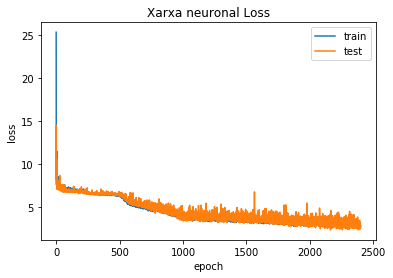

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Xarxa neuronal Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

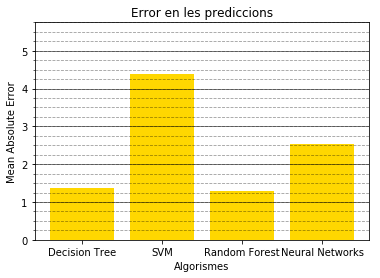

<Figure size 432x288 with 0 Axes>

In [130]:
maeAlgs={"Decision Tree":metrics.mean_absolute_error(y_test, y_predDT), 
             "SVM":metrics.mean_absolute_error(y_test, y_predSVM), 
            "Random Forest":metrics.mean_absolute_error(y_test, y_predRT), 
            "Neural Networks":metrics.mean_absolute_error(y_test, y_predNN)}

fig, ax = plt.subplots()
plt.bar(range(len(maeAlgs)), list(maeAlgs.values()), align='center',color='gold')
plt.xticks(range(len(maeAlgs)), list(maeAlgs.keys()))

plt.grid(axis='y', alpha=0.75, color='black')
ax.set_yticks(np.arange(0, 6, 1))
ax.set_yticks(np.arange(0, 6, 0.25), minor=True)
ax.yaxis.grid(True, linestyle='-', which='major', color='black',
               alpha=0.6)
ax.yaxis.grid(True, linestyle='--', which='minor', color='black',
               alpha=0.4)

plt.xlabel("Algorismes")
plt.ylabel("Mean Absolute Error")
plt.title("Error en les prediccions")
plt.show()
plt.savefig('comparacioMetricsAlgs.png')

In [131]:
tempsReals = []
tempsRF = []
tempsSVM = []
tempsDT = []
tempsNN = []
i=1
for row in y_test:
    if (i < 20):
        tempsReals.append(row)
    i += 1
i=1
for row in y_predRT:
    if (i < 20):
        tempsRF.append(row)
    i += 1
i=1
for row in y_predSVM:
    if (i < 20):
        tempsSVM.append(row)
    i += 1
i=1
for row in y_predDT:
    if (i < 20):
        tempsDT.append(row)
    i += 1
i=1
for row in y_predNN:
    if (i < 20):
        tempsNN.append(row)
        
    i += 1

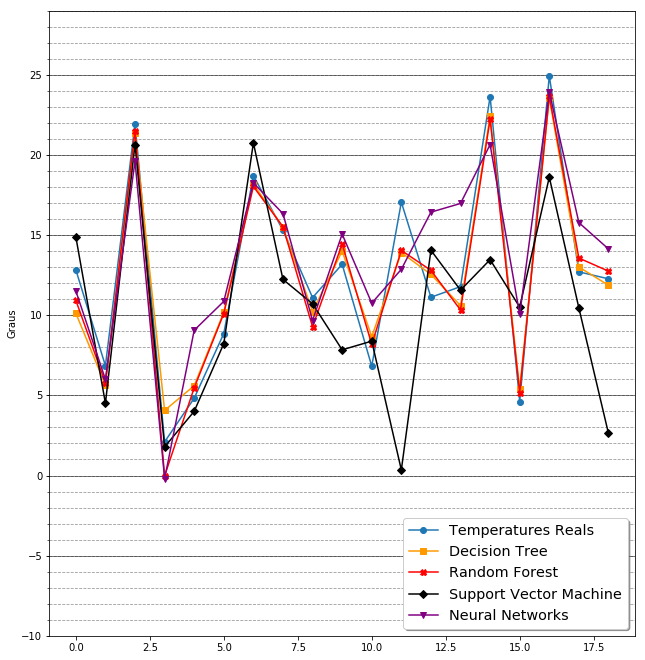

In [139]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 11.5)

plt.plot(tempsReals,marker='o',label = 'Temperatures Reals')
plt.plot(tempsDT,marker='s', color = '#ff9900', label = 'Decision Tree')
plt.plot(tempsRF,marker='X', color = 'red', label = 'Random Forest')
plt.plot(tempsSVM,marker='D', color = 'black', label = 'Support Vector Machine')
plt.plot(tempsNN,marker='v', color = 'purple', label = 'Neural Networks')

plt.grid(axis='y', alpha=0.75)
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.ylabel('Graus')
ax.set_yticks(np.arange(-10, 30, 5))
ax.set_yticks(np.arange(-10, 30, 1), minor=True)
ax.yaxis.grid(True, linestyle='-', which='major', color='black',
               alpha=0.6)
ax.yaxis.grid(True, linestyle='--', which='minor', color='black',
               alpha=0.4)

plt.show()
#plt.savefig('comparacioAlgs.png')